In [21]:
import numpy as np
import pandas as pd
import matrixprofile as mp
from matplotlib import pyplot as plt
import meters
import seaborn as sns

In [12]:
def phase_mean_profile(ts_list, index, window_size):
    subseq_num = len(ts_list[index]) // window_size
    mean_ts = np.mean(np.delete(ts_list, index, axis=0), axis=0)
    prof = []
    for j in range(subseq_num):
        subseq = ts_list[index][j * window_size: (j + 1) * window_size]
        min_dist = np.min(
            [np.linalg.norm(subseq - mean_ts[k * window_size: (k + 1) * window_size]) for k in range(subseq_num)])
        prof.append(min_dist)
    return prof

In [2]:
def mprofile(ts):
    profile = mp.compute(ts, windows=48)
    figures = mp.visualize(profile)
    ax = plt.gca()
    ax.set_title(f'Matrix profile, 1 day window')

In [3]:
meters_data = meters.MetersData('ukpn-smart-meter-consumption-substation.csv', 'ukpn-smart-meter-consumption-lv-feeder.csv')

In [6]:
data = pd.read_csv('lv_data.csv', index_col=0).to_numpy()
norm_data = (data - np.mean(data, axis=1)[:, np.newaxis]) / np.std(data, axis=1)[:, np.newaxis]
norm_data

array([[-0.5897838 , -0.95193646, -1.0831769 , ..., -0.26702692,
        -0.04124607, -0.60007021],
       [ 0.72355091, -0.05017207, -0.39508472, ..., -0.33682244,
        -0.91556102, -1.05072949],
       [-0.50706511, -0.42187561, -0.45123145, ..., -0.12636279,
        -0.62636255, -1.02703701],
       ...,
       [-1.05634376,  0.28547533,  0.97156021, ..., -1.00739475,
        -1.26925485, -1.69256683],
       [-0.04643146, -0.56048694, -0.48086632, ...,  0.64912812,
        -0.36568697, -0.6074863 ],
       [-0.69081118, -0.64554899, -0.77180666, ...,  0.54651396,
         0.51435398,  0.02445042]])

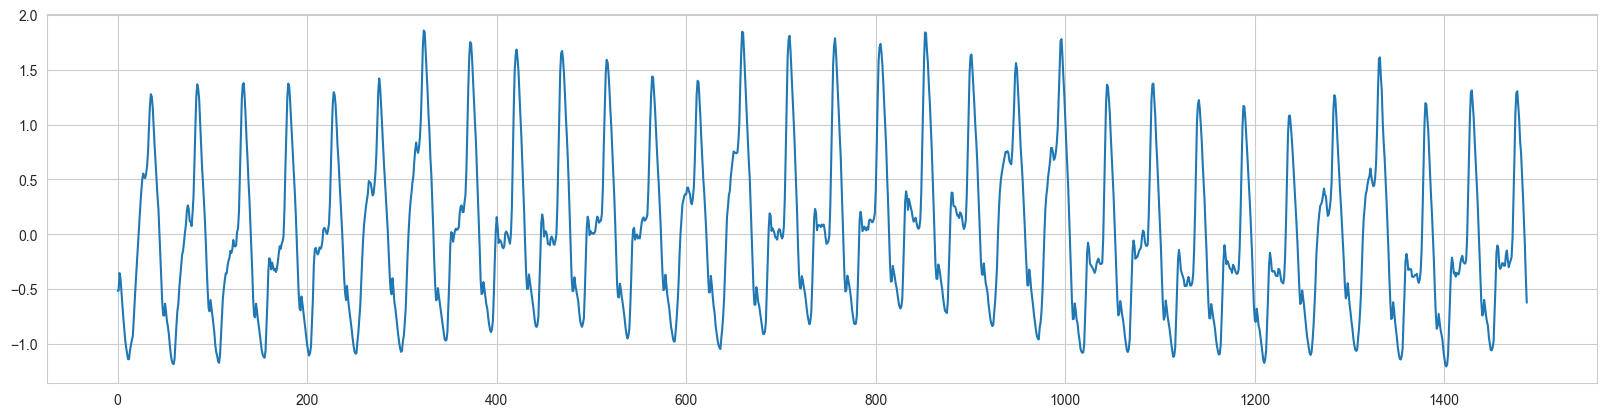

In [11]:
fig = plt.gcf()
plt.plot(np.sum(norm_data, axis=0) / 1488)
fig.set_figwidth(20)

In [15]:
pmprofiles = np.zeros((1642, 31))

for i in range(1642):
    pmprofiles[i] = phase_mean_profile(norm_data, i, 48)
    print(f'ready {round(i / 1642 * 100, 2)}%')
    
pmprofiles

ready 0.0%
ready 0.06%
ready 0.12%
ready 0.18%
ready 0.24%
ready 0.3%
ready 0.37%
ready 0.43%
ready 0.49%
ready 0.55%
ready 0.61%
ready 0.67%
ready 0.73%
ready 0.79%
ready 0.85%
ready 0.91%
ready 0.97%
ready 1.04%
ready 1.1%
ready 1.16%
ready 1.22%
ready 1.28%
ready 1.34%
ready 1.4%
ready 1.46%
ready 1.52%
ready 1.58%
ready 1.64%
ready 1.71%
ready 1.77%
ready 1.83%
ready 1.89%
ready 1.95%
ready 2.01%
ready 2.07%
ready 2.13%
ready 2.19%
ready 2.25%
ready 2.31%
ready 2.38%
ready 2.44%
ready 2.5%
ready 2.56%
ready 2.62%
ready 2.68%
ready 2.74%
ready 2.8%
ready 2.86%
ready 2.92%
ready 2.98%
ready 3.05%
ready 3.11%
ready 3.17%
ready 3.23%
ready 3.29%
ready 3.35%
ready 3.41%
ready 3.47%
ready 3.53%
ready 3.59%
ready 3.65%
ready 3.71%
ready 3.78%
ready 3.84%
ready 3.9%
ready 3.96%
ready 4.02%
ready 4.08%
ready 4.14%
ready 4.2%
ready 4.26%
ready 4.32%
ready 4.38%
ready 4.45%
ready 4.51%
ready 4.57%
ready 4.63%
ready 4.69%
ready 4.75%
ready 4.81%
ready 4.87%
ready 4.93%
ready 4.99%
ready 5.05%


array([[2.94544641, 3.02925404, 3.02121951, ..., 2.5866538 , 3.07409505,
        2.33404097],
       [4.91077419, 4.41905319, 3.53733657, ..., 3.47755295, 4.00515391,
        2.63708993],
       [2.39598932, 2.5472484 , 3.32429333, ..., 2.7207508 , 2.76441228,
        2.93674512],
       ...,
       [8.75117916, 4.09549285, 4.04060351, ..., 5.43908087, 5.42938869,
        5.29165035],
       [4.1468931 , 3.33011339, 5.03842795, ..., 3.33574521, 5.03009519,
        6.22564137],
       [4.38391852, 3.42060753, 3.91080713, ..., 3.86159157, 4.07514887,
        4.03858473]])

In [19]:
pm_metric = np.sum(pmprofiles, axis=1) / 31

<Axes: >

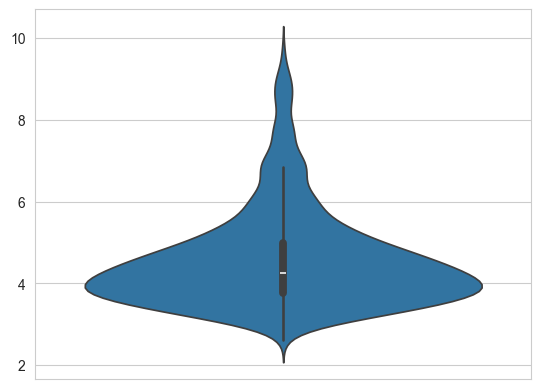

In [22]:
sns.violinplot(pm_metric)

In [23]:
np.quantile(pm_metric, 0.9)

6.187407094225706

In [26]:
np.column_stack((-np.sort(-pm_metric), np.argsort(-pm_metric)))

array([[   9.74712723,  223.        ],
       [   9.69320242, 1579.        ],
       [   9.43137508, 1076.        ],
       ...,
       [   2.82897388, 1623.        ],
       [   2.6853345 , 1489.        ],
       [   2.62122739,  109.        ]])

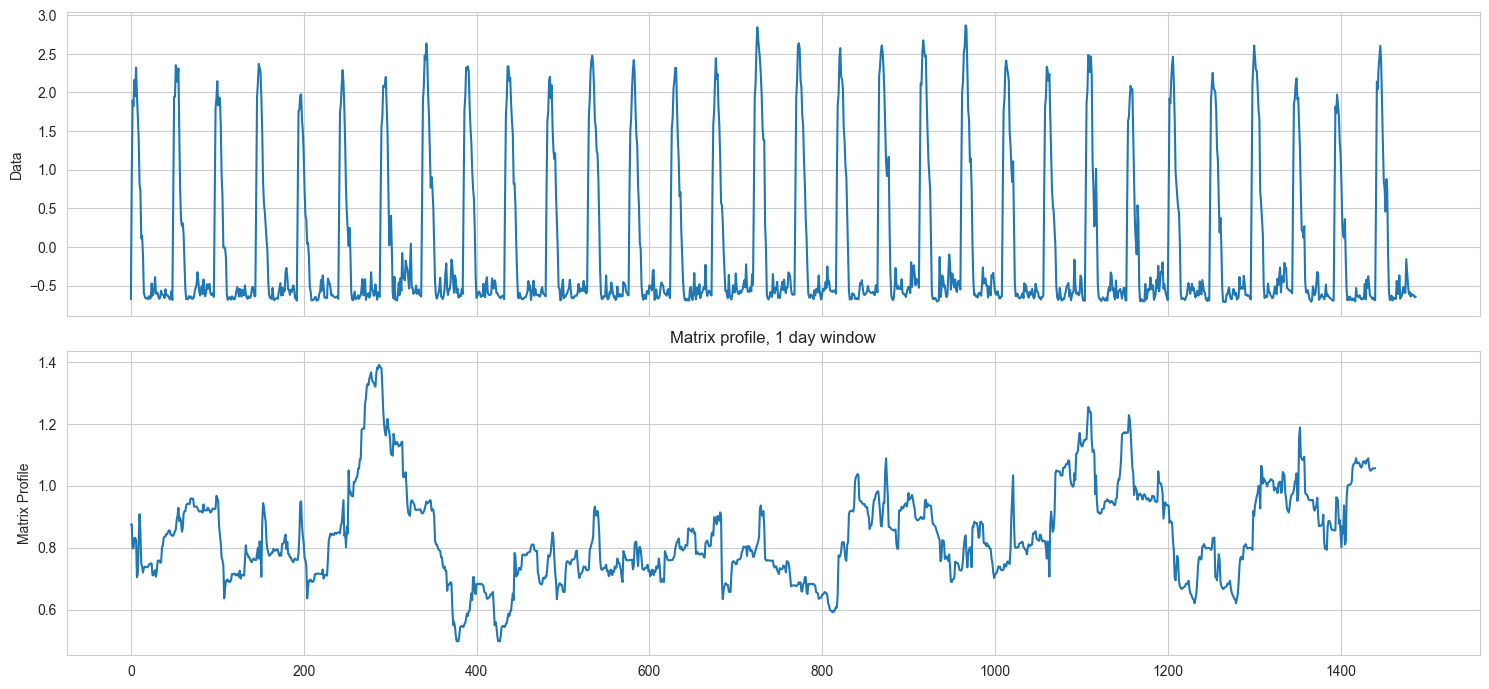

In [122]:
mprofile(norm_data[223])

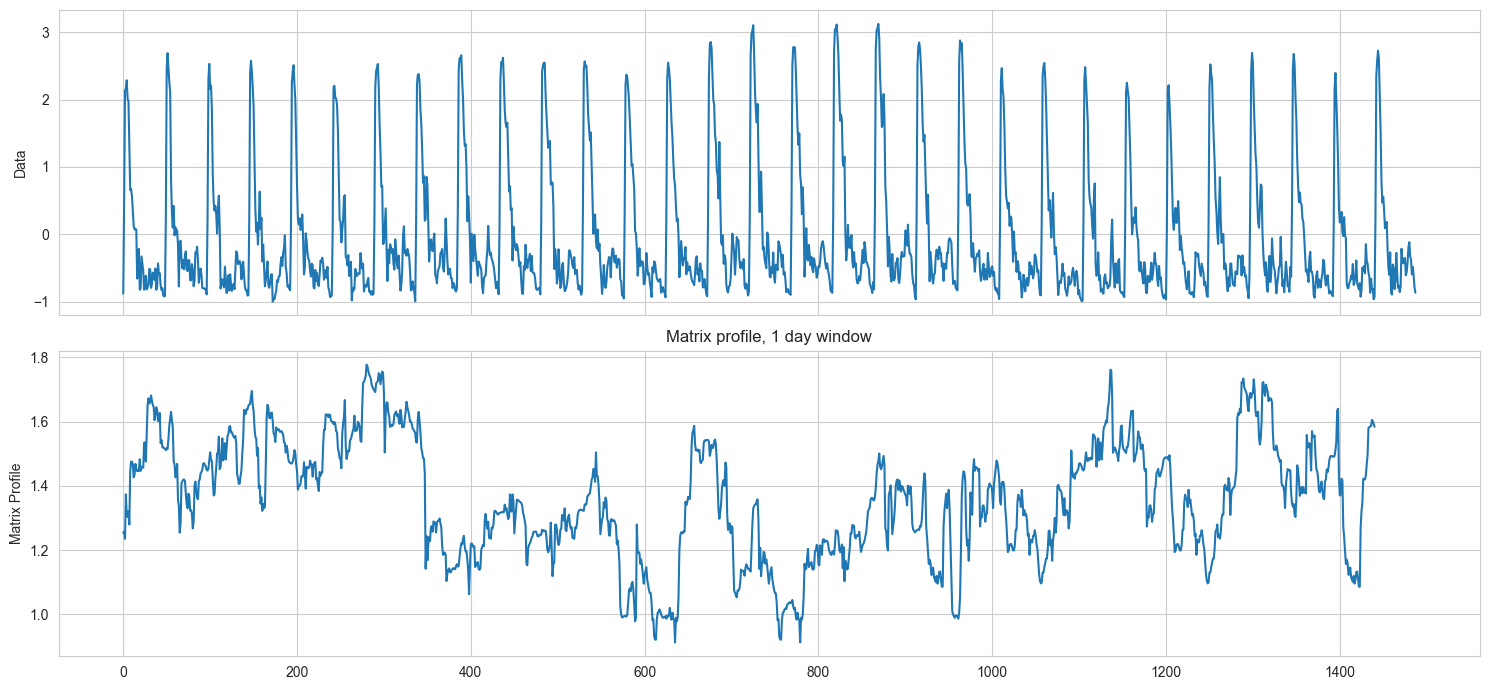

In [123]:
mprofile(norm_data[1076])

In [124]:
pm_local_metric = np.max(pmprofiles, axis=1)
pm_local_metric

array([4.65638007, 6.81469173, 6.27802301, ..., 9.43262074, 7.5428611 ,
       6.94164227])

<Axes: >

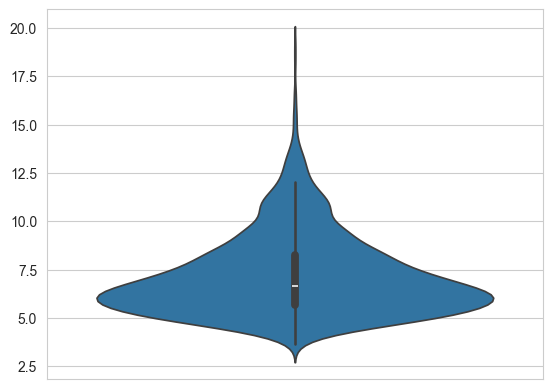

In [126]:
sns.violinplot(pm_local_metric)

In [127]:
np.quantile(pm_local_metric, 0.9)

10.231689702297244

In [128]:
np.column_stack((-np.sort(-pm_local_metric), np.argsort(-pm_local_metric)))

array([[  19.12664264, 1410.        ],
       [  18.23126211,  463.        ],
       [  16.75105712, 1391.        ],
       ...,
       [   3.94702664,   12.        ],
       [   3.93421347,  358.        ],
       [   3.66594689, 1489.        ]])

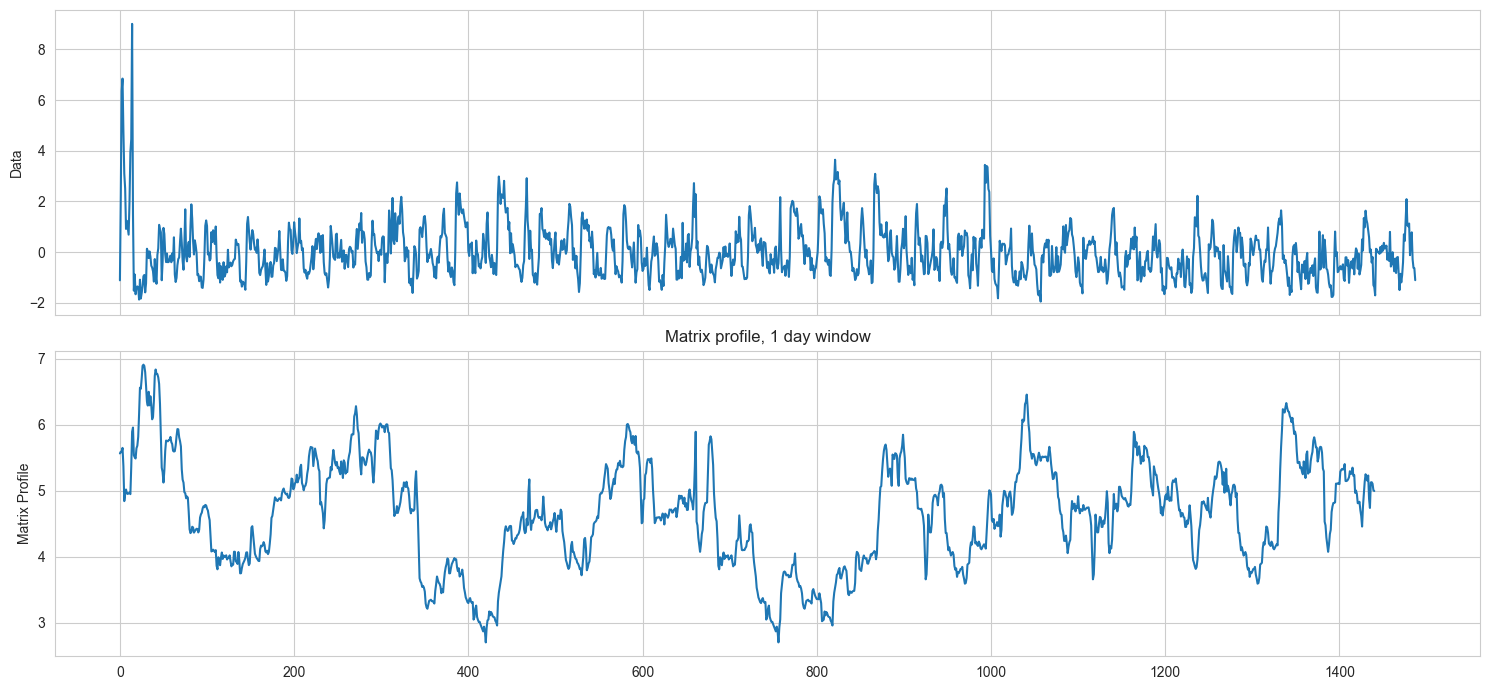

In [129]:
mprofile(norm_data[1410])

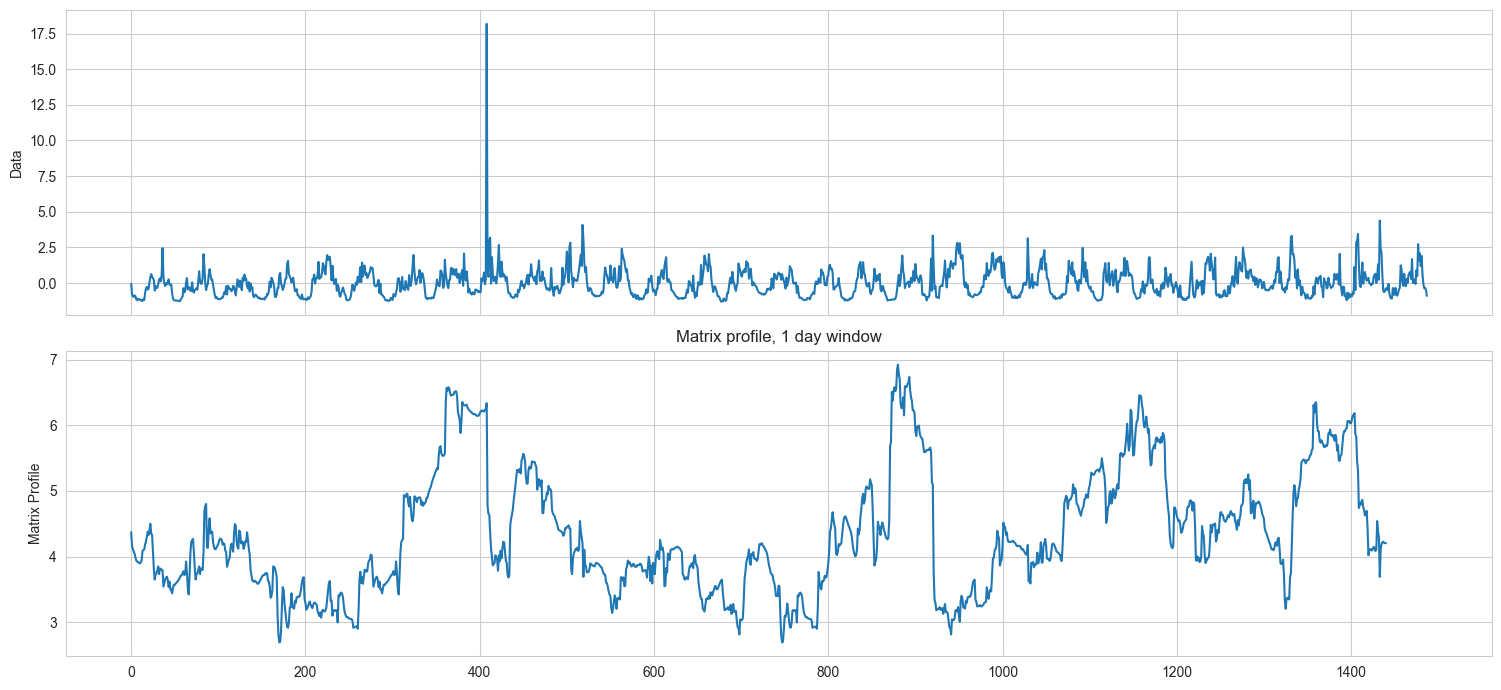

In [130]:
mprofile(norm_data[463])

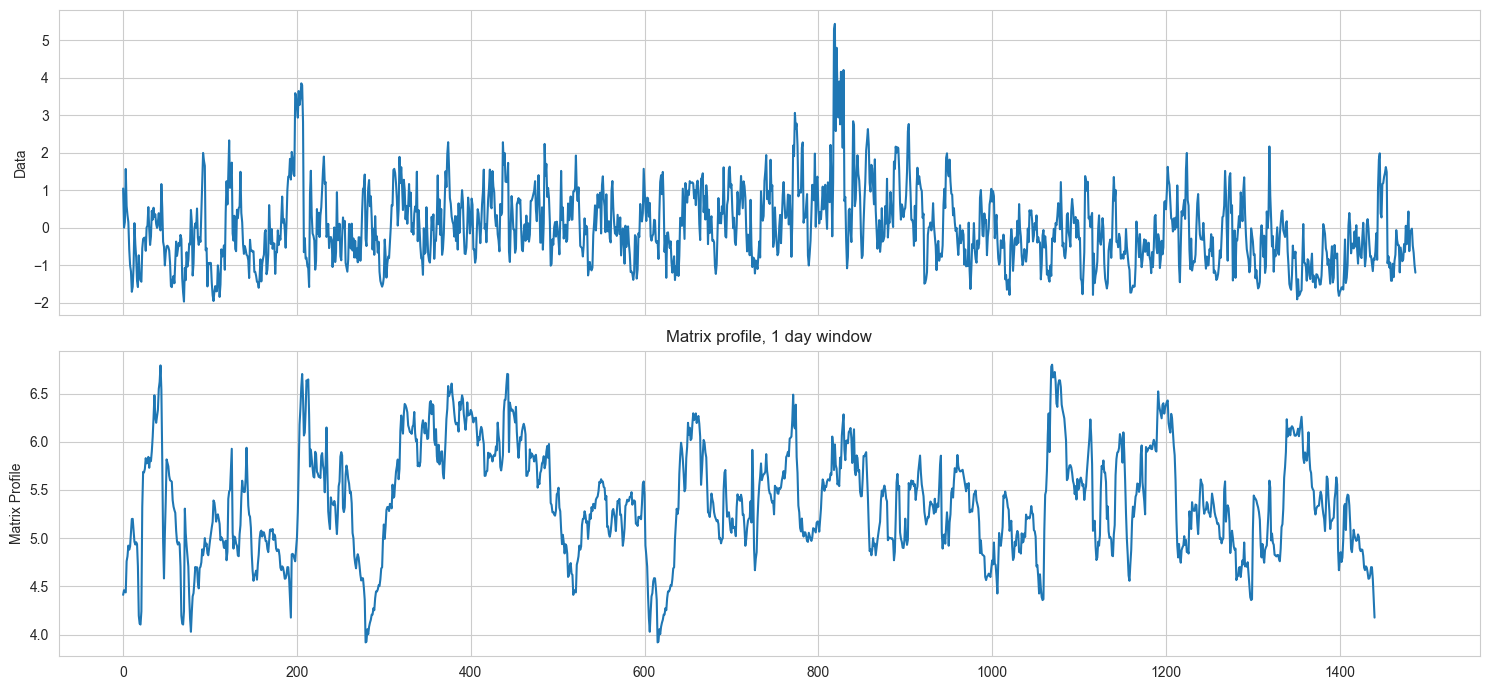

In [131]:
mprofile(norm_data[1391])

In [ ]:
phase_profiles = []
counts = []
datas = []
q = 0
for index in np.where(meters_data.lv_counts >= 3)[0]:
    print(index)
    lv = meters_data.get_lv(index)
    n = meters_data.lv_counts[index]
    if len(lv) != n * 1488:
        continue
    counts += [n] * n
    data = np.zeros((n, 1488))
    for i in range(n):
        row = lv[lv['lv_id'] == i]['active_power_per_device'].to_numpy()
        row = (row - row.mean()) / row.std()
        data[i] = row
        datas.append(row)
    for i in range(n):
        phase_profile = meters.phase_profile(data, i, 48)
        phase_profiles.append(phase_profile)
    print(f'ready {round(q / 193 * 100, 2)}%')
    q+=1
phase_profiles = np.array(phase_profiles)
counts = np.array(counts)
datas = np.array(datas)

In [87]:
phase_profiles

array([[6.79819763, 7.05668018, 6.17624696, ..., 3.87563348, 4.33527404,
        4.68081103],
       [4.76576774, 4.43688176, 4.08871246, ..., 4.12479048, 4.19410841,
        4.64549705],
       [4.99608295, 3.31742169, 3.97698477, ..., 3.36594523, 3.5098529 ,
        3.84619976],
       ...,
       [3.82007107, 3.10140877, 3.4061517 , ..., 3.51755307, 3.77117544,
        3.50966116],
       [6.45437515, 4.87685814, 4.97519537, ..., 5.75782516, 3.51755307,
        5.54348023],
       [4.72634781, 3.8541533 , 3.01718296, ..., 3.62435996, 3.85179879,
        3.99436688]])

In [88]:
p_metric = np.sum(phase_profiles, axis=1) / 31
p_metric

array([5.08102025, 4.37177733, 3.9771721 , 3.92324092, 4.07893442,
       3.92673807, 4.02449119, 3.8038472 , 3.07527285, 3.58228024,
       3.58838582, 3.74357009, 3.9517067 , 4.12300334, 5.92037198,
       4.00438341, 7.04499359, 4.95490047, 4.75116257, 4.40117072,
       4.08486611, 4.19793887, 6.27357856, 5.31273082, 3.84933296,
       3.90653579, 3.73969498, 5.25869764, 4.98777753, 4.59866321,
       4.51538356, 4.38761875, 3.80723851, 4.81942207, 3.47562891,
       4.18594471, 5.79171664, 4.91374752, 4.53059921, 5.03568474,
       4.01456719, 3.44403231, 3.42420172, 4.46414231, 4.48035197,
       6.9188304 , 5.13744582, 4.42487911, 4.14069001, 5.4904974 ,
       6.20569003, 3.96514236, 5.75701904, 4.93539819, 4.86352312,
       5.15649585, 5.90486715, 5.13000153, 3.65151021, 4.08801351,
       4.61701481, 4.98149161, 5.42850478, 6.52600518, 4.9334619 ,
       4.50263668, 4.74268791, 4.11855949, 4.14984947, 5.43523569,
       5.61278208, 5.16507276, 4.43507577, 5.34291988, 4.02248

<Axes: >

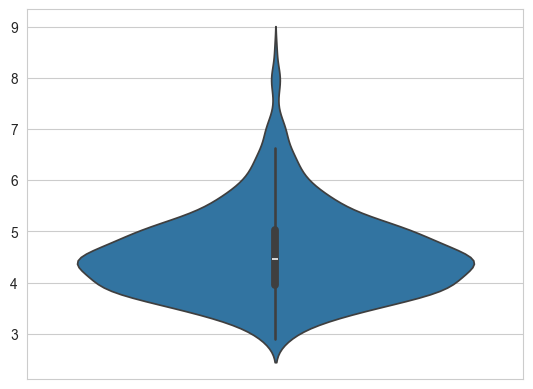

In [89]:
sns.violinplot(p_metric)

In [102]:
np.quantile(p_metric, 0.9)

5.643595866304454

In [97]:
p_results = np.column_stack((p_metric, np.arange(730), counts))
p_results[p_results[:,0].argsort()[::-1]]

array([[  8.54340208, 312.        ,   3.        ],
       [  8.07736643, 290.        ,   4.        ],
       [  8.05754144, 260.        ,   3.        ],
       ...,
       [  2.94471162, 662.        ,   3.        ],
       [  2.91728134, 296.        ,   3.        ],
       [  2.90923387, 642.        ,   6.        ]])

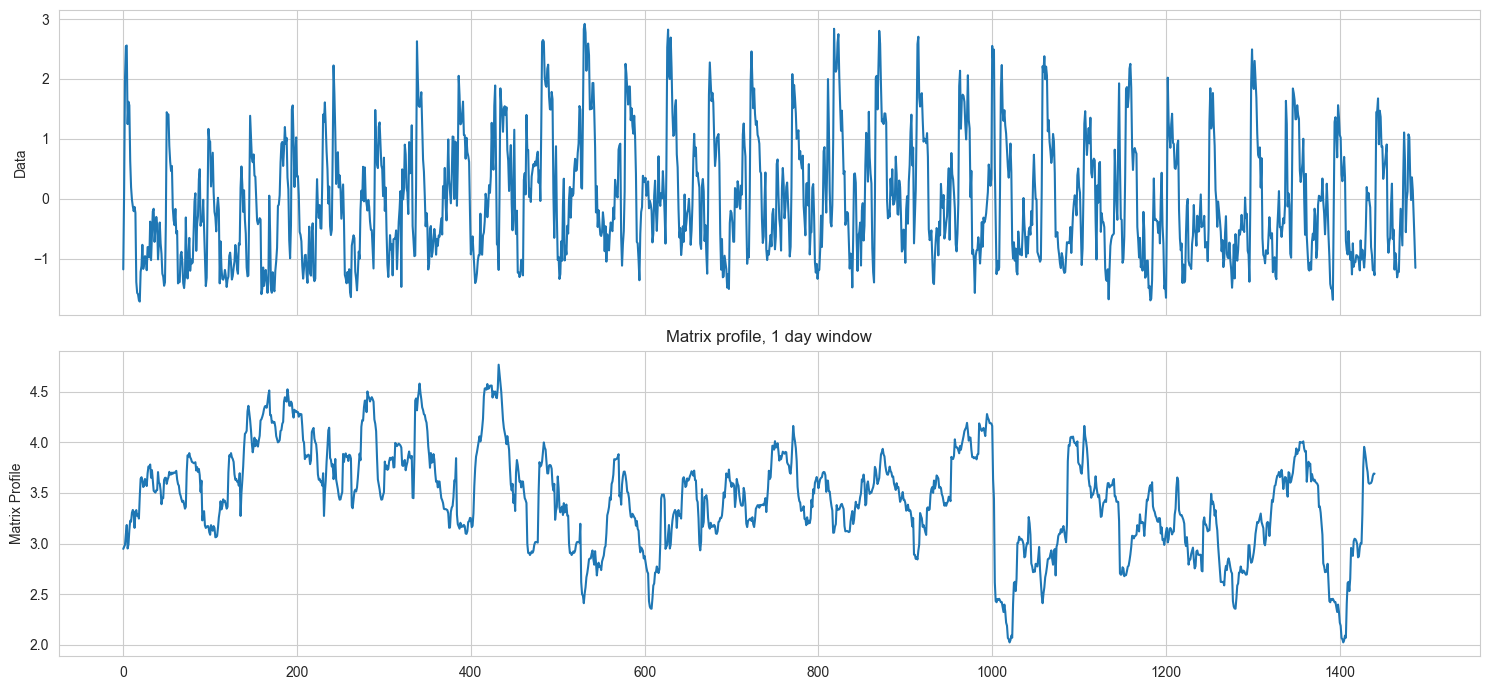

In [118]:
mprofile(datas[290])

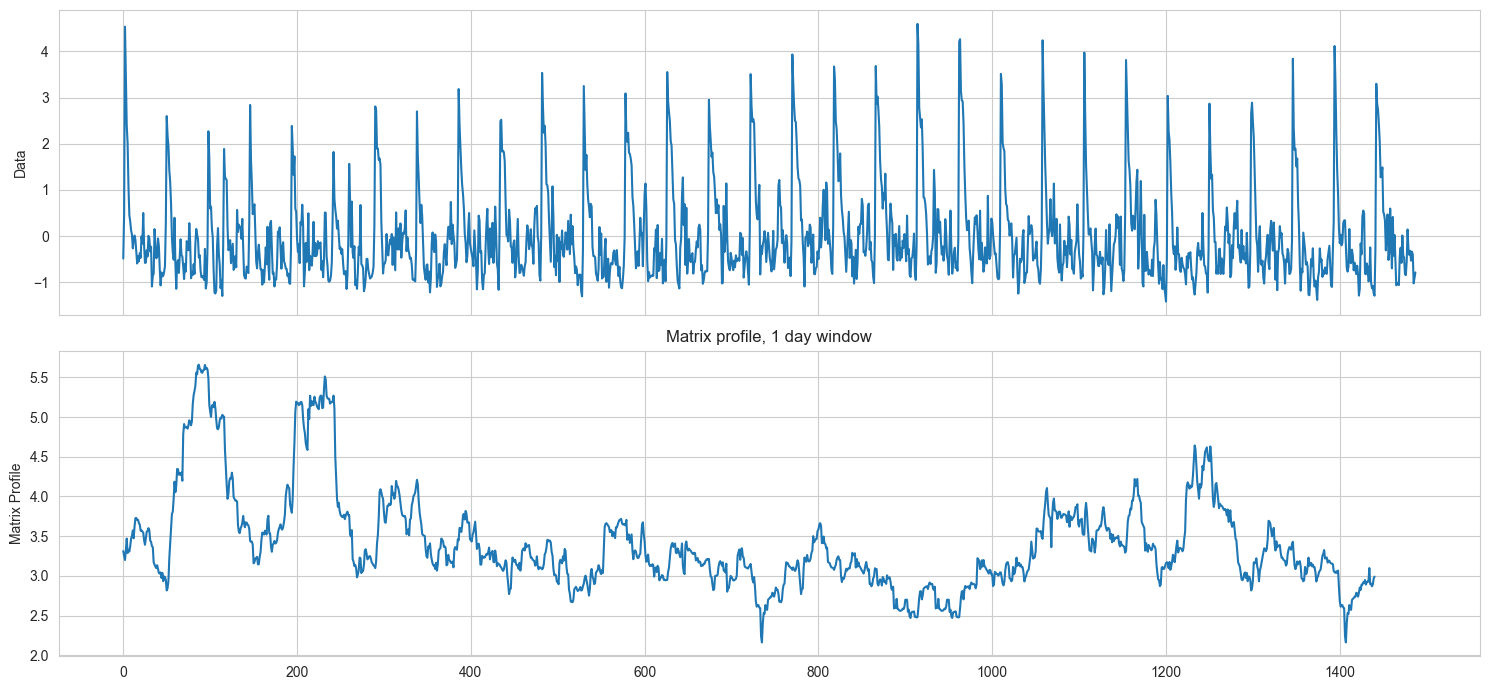

In [114]:
mprofile(datas[260])

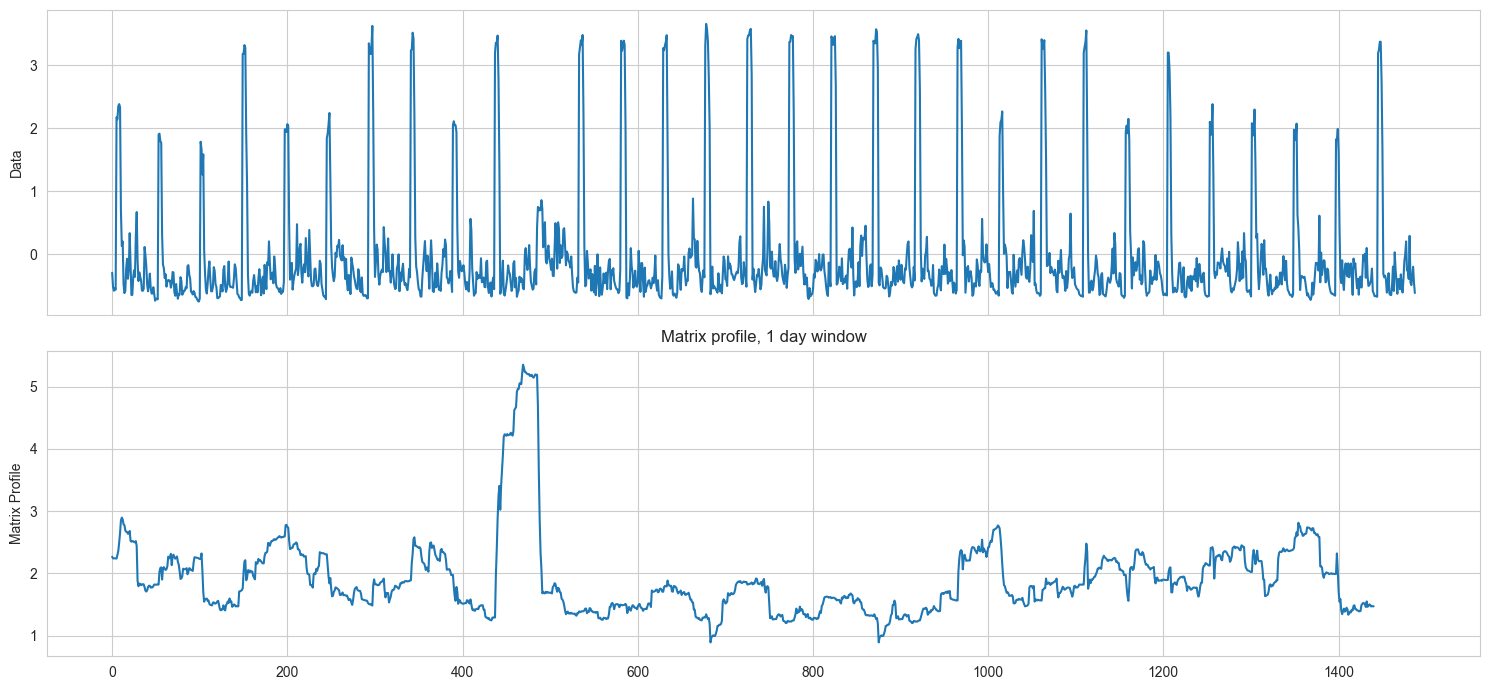

In [116]:
mprofile(datas[336])

In [91]:
p_local_metric = np.max(phase_profiles, axis=1)
p_local_metric

array([ 8.51493056,  5.45532621,  5.37610018,  4.71848364,  6.04405038,
        4.92726549,  5.41334011,  5.07364712,  3.46013413,  4.70296434,
        5.35949737,  5.4753692 ,  6.73955036,  5.17382685,  8.57614002,
        5.4281776 , 12.8064799 ,  7.49020142,  5.76642691,  7.77881269,
        5.96687356,  5.51326538, 11.60033145,  8.03853239,  5.2027845 ,
        4.71596779,  5.14018464,  7.3245939 ,  6.68856077,  5.85791939,
        5.6972623 ,  7.23663205,  4.60582797,  6.59617004,  4.86396671,
        6.48206017,  9.18600606,  6.99583545,  5.975775  ,  6.70461867,
        5.32703189,  4.39099743,  4.15178906,  6.572238  ,  6.60199672,
       12.18186583,  6.9360534 ,  5.58809336,  5.78903821,  9.1502491 ,
       10.0059584 ,  5.33439502,  6.90254634,  7.63516347,  7.05466828,
       13.68068799,  7.6991495 ,  7.25626984,  5.0355094 ,  7.60363523,
        9.44689467,  7.2084647 ,  7.22693516,  8.2372989 ,  6.35871185,
        6.7389436 ,  6.18345142,  6.34361986,  5.59565419,  7.51

<Axes: >

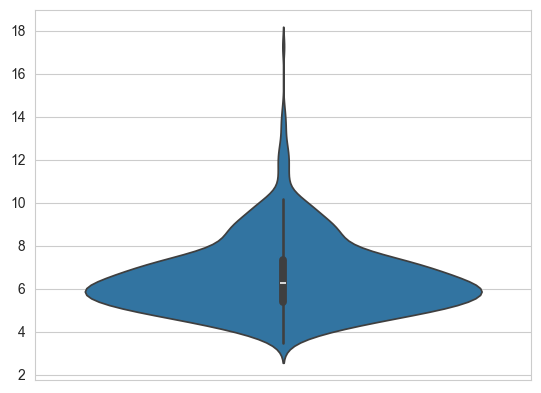

In [92]:
sns.violinplot(p_local_metric)

In [103]:
np.quantile(p_local_metric, 0.9)

8.820908426781692

In [98]:
p_results = np.column_stack((p_local_metric, np.arange(730), counts))
p_results[p_results[:,0].argsort()[::-1]]

array([[ 17.27407345, 587.        ,   5.        ],
       [ 14.32665113, 303.        ,   4.        ],
       [ 13.68068799,  55.        ,   6.        ],
       ...,
       [  3.57330164, 297.        ,   3.        ],
       [  3.49998573, 642.        ,   6.        ],
       [  3.46013413,   8.        ,   6.        ]])

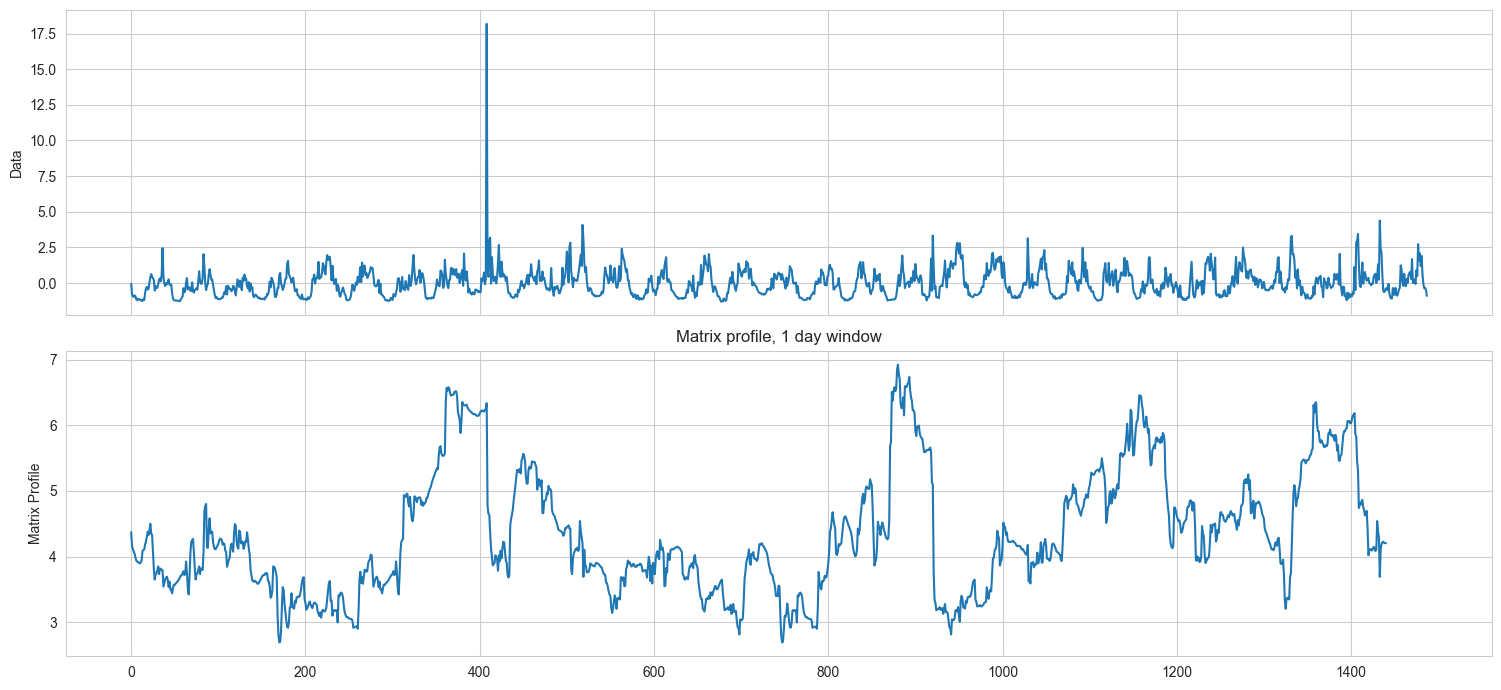

In [105]:
mprofile(datas[587])

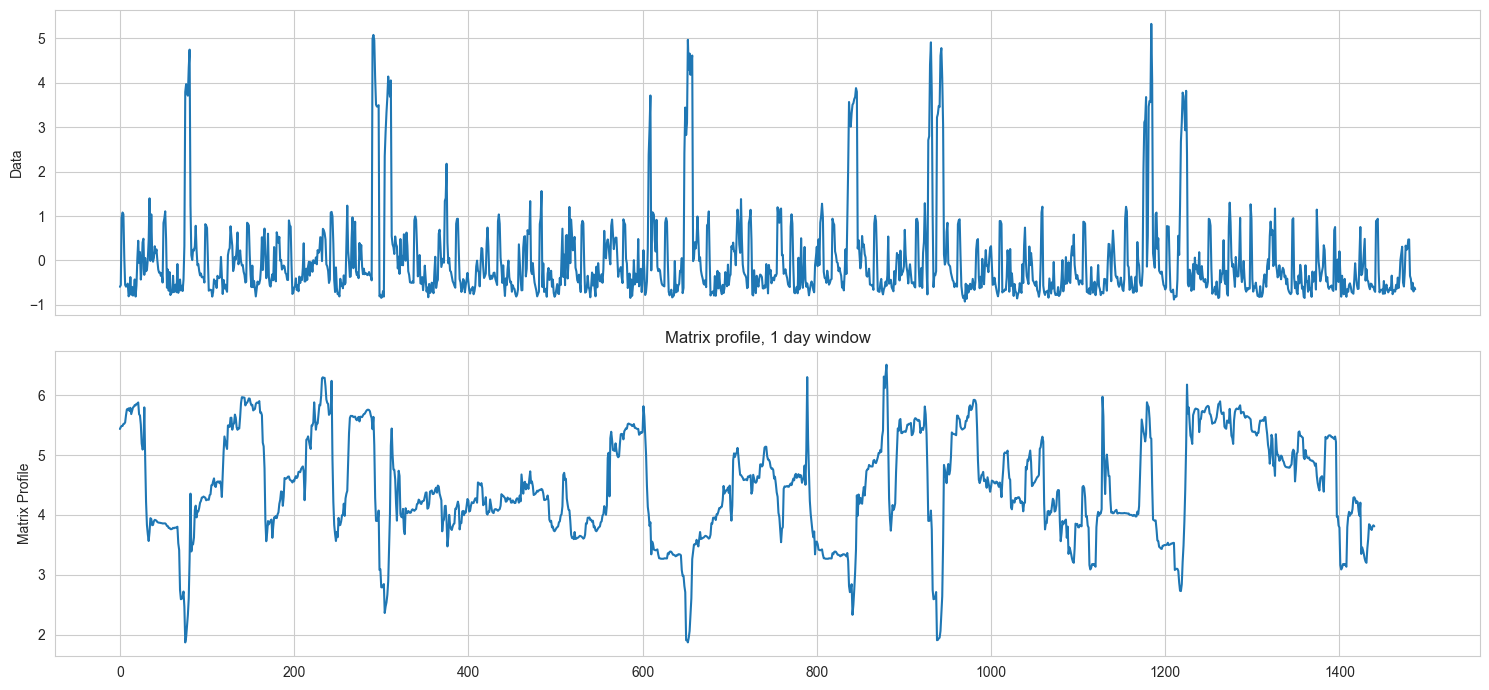

In [107]:
mprofile(datas[303])

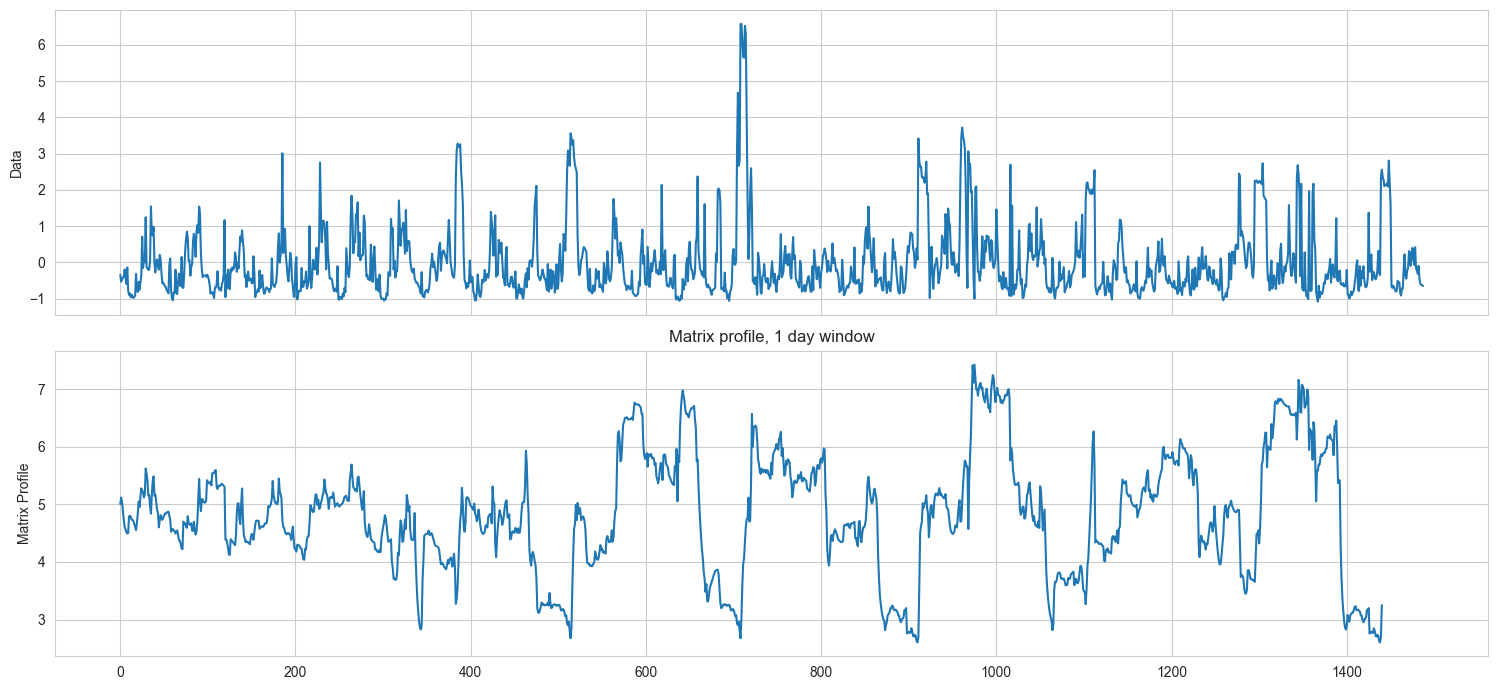

In [106]:
mprofile(datas[55])